<h1 style="color:red;">Question I</h1>

<p>
    Classification decision trees are used for predicting categorical outputs using predictors (inputs).
    <br/>
    One very important use case of these classification trees is in medical testing, in which we try to find the frequencies of False/True positives/negatives.
</p>
<p>
    The first big difference between the predictions of classification decision trees and multiple linear regression models is the outpt, which is categorical for the former and continuous for the latter.
    <br/><br/>
    The prediction approach is also different. 
    <br/>
    Multiple linear regression uses a linear form (a mathematical formula) to predict the outcome. 
    <br/>
    Classification decision trees use a binary tree structure and they go down said structure by following the results of the boolean expressions in each of its nodes.
</p>

Here is the summary of my conversation with ChatGPT for this question:

### **Classification Decision Trees**
- **Purpose**: Classify data into categories (e.g., "Spam" vs. "Not Spam").
- **How They Work**: Split data using feature-based rules in a tree structure.
- **Pros**: Easy to interpret, handles nonlinearity, robust to outliers, no feature scaling needed.

### **Multiple Linear Regression**
- **Purpose**: Predict continuous values (e.g., house prices).
- **How It Works**: Uses a linear formula:
  \[
  \hat{y} = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n
  \]
- **Pros**: High interpretability for linear relationships.
- **Cons**: Sensitive to outliers, needs feature scaling, assumes data linearity.

### **Key Differences**
| Feature                  | Linear Regression   | Decision Trees           |
|--------------------------|---------------------|--------------------------|
| **Output**               | Continuous          | Categorical              |
| **Nonlinearity**         | No                  | Yes                      |
| **Outlier Robustness**   | No                  | Yes                      |
| **Feature Scaling**      | Required            | Not Needed               |

### **Conclusion**
- Use **linear regression** for linear, continuous predictions.
- Use **classification trees** for categorical, nonlinear classifications.

<h1 style="color:red;">Question II</h1>

<p>
    1) For accuracy, one use case is spam email detection. In fact, when sorting spam emails, you want spam to go to the correct folder, <br/>
    but you also don't want to send important emails to said spam folder.<br/><br/>
    However, both scenarios are not that problematic as when we don't find an email, we are often reminded to check our spam folder, and if a spam email is in the standard inbox, we can simply send it to the spam folder, hence using accuracy for our model.
</p>
<br/><br/>
<p>
    2) Sensitivity is very important in disease diagnosis, in healthcare.<br/>
    This is because when someone is tested negative, they often simply go on with their lives, which can be life-threatening.<br/><br/>
    When someone is tested positive though, they often go through further testing, which may reveal the inacurracy of a false positive
</p>
<br/><br/>
<p>
    3) A use case for specificity is credit card fraud detection.<br/>
    If a transaction is wrongly flagged as fraudulent (which would be a false negative here), then they will simply call the legitimate card holder or send them a message to fix said false negative.<br/><br/>
    Correct negatives are really important though, as that is the proportion of fraudulent transactions that they catch, and that is what they want to maximize, while minimizing false positives.
</p>
<br/><br/>
<p>
    4) One use case for precision is targeted advertising.<br/>
    Sending ads to uninterested users is very costly, can damage the brand's image as these uninterested customers get sick of said ad and talk negatively about it with their entourage.<br/>
    Thus, it is really important for these ads to be sent to interested users and not uninterested users, i.e. it is important for them to have a higher proportion of true positives.
</p>

Here is the summary of my discussion with ChatGPT for Question 2:

- **Accuracy**: Useful for spam email detection where overall correctness is key.
- **Sensitivity**: Crucial in disease diagnosis (e.g., cancer screening) to catch all true cases.
- **Specificity**: Important for fraud detection to avoid flagging legitimate transactions.
- **Precision**: Valuable in targeted advertising to ensure ads reach genuinely interested customers. 

Each metric is suited to different scenarios based on the costs of false positives and false negatives.

<h1 style="color:red;">Question III</h1>

In [37]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz as gv
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# create `ab_reduced_noNaN` based on the specs above
ab_reduced_noNaN = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced_noNaN.drop(['Weight_oz', 'Width', 'Height'], axis=1, inplace=True)
ab_reduced_noNaN.dropna(inplace=True)
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

ab_reduced_noNaN.describe()

,List Price,Amazon Price,NumPages,Pub year,Thick
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,18.362978,12.941034,334.272727,2002.175549,0.903448
std,13.976755,12.436673,161.601510,10.646133,0.365261
min,1.500000,0.770000,24.000000,1936.000000,0.100000
25%,13.890000,8.600000,208.000000,1998.000000,0.600000
50%,15.000000,10.200000,320.000000,2005.000000,0.900000
75%,19.360000,12.560000,416.000000,2010.000000,1.100000
max,139.950000,139.950000,896.000000,2011.000000,2.100000


<h1 style="color:red;">Question IV</h1>

<p>
    The line y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] converts the categorical variable "Hard_or_Paper" into a binary indicator variable which is equal to 1 if the category is 'H' and 0 otherwise (if the category is 'P') and assigns this new column to the variable y
    <br/><br/>
    The line X = ab_reduced_noNaN[['List Price']] assigns to the variable X a DataFrame with only the column 'List Price'
</p>


Accuracy for clf: 0.84375


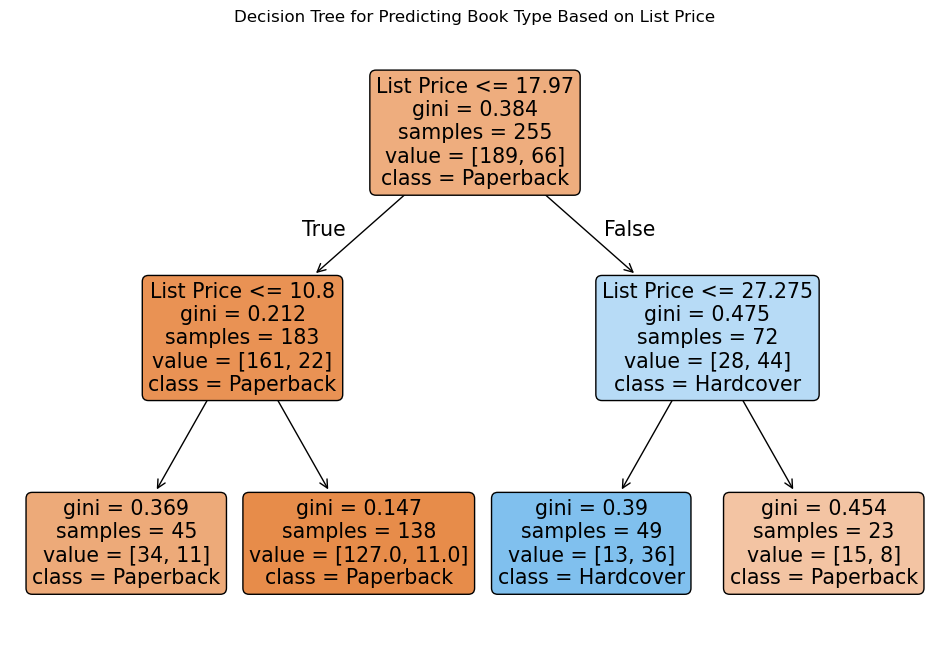

In [48]:
import random
random.seed(130)
# Assuming `ab_reduced_noNaN` is already loaded as a DataFrame.

# Step 1: Split the dataset into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Prepare the training and testing sets for clf
y_train = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # 1 for hardcover, 0 for paperback
y_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']
X_train = ab_reduced_noNaN_train[['List Price']]
X_test = ab_reduced_noNaN_test[['List Price']]

# Initialize and train clf with max_depth=2
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for clf:", accuracy)

# Visualize the decision tree for clf
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True, rounded=True)
plt.title("Decision Tree for Predicting Book Type Based on List Price")
plt.show()


Summary of the discussion with ChatGPT for Question 4:

1. **Data Preparation**: We cleaned the data, encoded the target (`Hard_or_Paper`), and selected `List Price` as the feature.
2. **Train-Test Split**: We split the data into 80% training and 20% testing.
3. **Model Training**: We trained the model with a `max_depth` of 2 to avoid overfitting.
4. **Evaluation**: We evaluated the model using **accuracy** and a **confusion matrix**.
5. **Visualization**: We visualized the decision tree using `plot_tree` to see how it makes predictions based on `List Price`.

<h1 style="color:red;">Question V</h1>

Accuracy for clf2: 0.859375


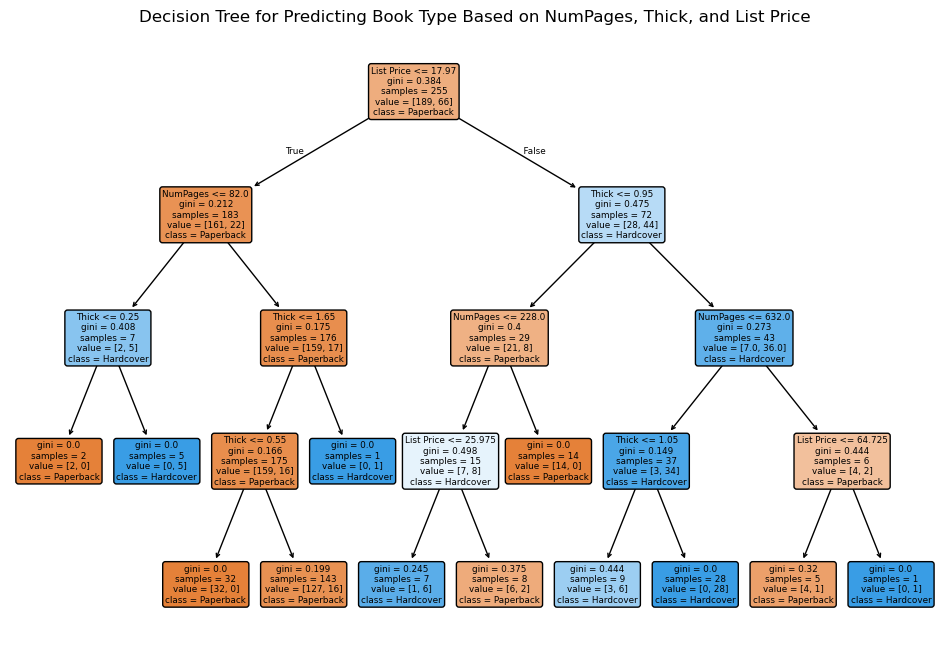

In [49]:
# Prepare the training and testing sets for clf2
y_train2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # 1 for hardcover, 0 for paperback
y_test2 = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']
X_train2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Initialize and train clf2 with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X_train2, y_train2)

# Make predictions and calculate accuracy
y_pred2 = clf2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy for clf2:", accuracy2)

# Visualize the decision tree for clf2
plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=["Paperback", "Hardcover"], filled=True, rounded=True)
plt.title("Decision Tree for Predicting Book Type Based on NumPages, Thick, and List Price")
plt.show()

In [53]:
X_train2.describe()

,NumPages,Thick,List Price
count,255.000000,255.000000,255.000000
mean,320.823529,0.878824,17.962667
std,151.705696,0.345190,13.653302
min,24.000000,0.100000,1.500000
25%,207.000000,0.600000,12.995000
50%,320.000000,0.800000,15.000000
75%,387.500000,1.100000,17.990000
max,896.000000,1.800000,139.950000


For the cfl2 model:
The first test is whether the list price is less than or equal to 17.97
If it is, then it moves on to the left subtree, otherwise, it moves on to the right subtree. It continues testing the boolean expressions in each of the Tree's Nodes, moving left if True and right if False, until it gets to a Leaf Node, thus giving its prediction depending on the leaf it reaches.

For example, if the book has a price of less than 17.97, less than 82 pages, and a thickness of over 0.25 units, then it predicts that the book is a Hardcover.

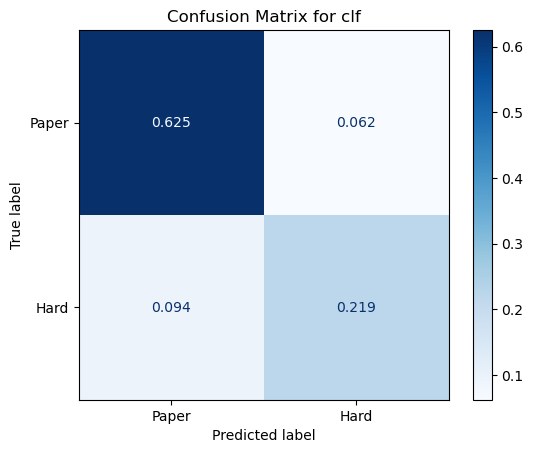

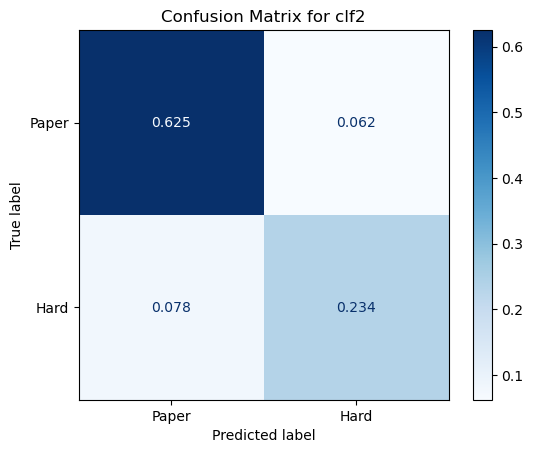

In [51]:
import seaborn as sns
# Plot the confusion matrix for clf
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paper", "Hard"])
disp.plot(cmap="Blues", values_format=".3f")
plt.title("Confusion Matrix for clf")
plt.show()

# Plot the confusion matrix for clf2
cm2 = confusion_matrix(y_test2, y_pred2, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Paper", "Hard"])
disp.plot(cmap="Blues", values_format=".3f")
plt.title("Confusion Matrix for clf2")
plt.show()

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
I calculated these values not by using the normalized percentages but by using the integer counts of each category.
<h2>For clf1:</h2>
<ul style='font-size:17px;'>
    <li>
        \(\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN} = \frac{14+40}{15+40+4+6} = \frac{55}{65} = \frac{11}{13} \approx 77 \% \)
    </li>
    <br/>
    <li>
        \(\text{Sensitivity} = \frac{TP}{TP+FN} = \frac{14}{20} = 70 \% \)
    </li>
    <br/>
    <li>
        \(\text{Specificity} = \frac{TN}{TN+FP} = \frac{40}{44} = \frac{10}{11} \approx 91 \% \)
    </li>
    <br/>
    <li>
        \(\text{Precision} = \frac{TP}{TP+FP} = \frac{14}{18} = \frac{7}{9} \approx 78 \% \)
    </li>
</ul>
<br/><br/>
<h2>For clf2:</h2>
<ul style='font-size:17px;'>
    <li>
        \(\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN} = \frac{15+40}{15+40+5+4} = \frac{55}{64}\approx 86 \% \)
    </li>
    <br/>
    <li>
        \(\text{Sensitivity} = \frac{TP}{TP+FN} = \frac{15}{20} = 75 \% \)
    </li>
    <br/>
    <li>
        \(\text{Specificity} = \frac{TN}{TN+FP} = \frac{40}{44} = \frac{10}{11} \approx 91 \% \)
    </li>
    <br/>
    <li>
        \(\text{Precision} = \frac{TP}{TP+FP} = \frac{15}{19} \approx 79 \% \)
    </li>
</ul>

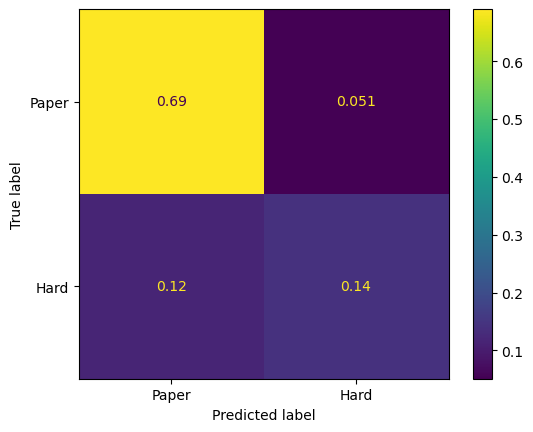

In [65]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train[['Hard_or_Paper']]=='H', 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1], normalize = 'all'),
    display_labels=["Paper", "Hard"]).plot()

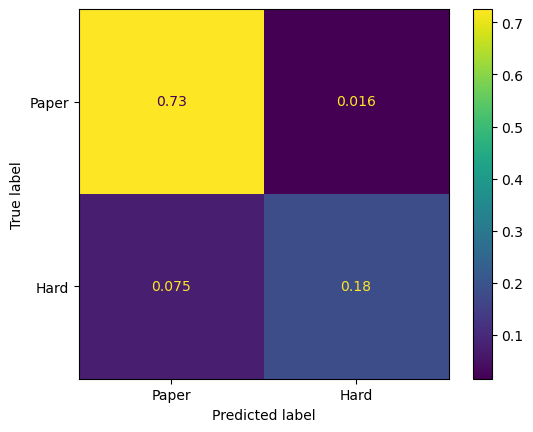

In [66]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train[['Hard_or_Paper']]=='H',
                     clf2.predict(ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1], normalize = 'all'),
    display_labels=["Paper","Hard"]).plot()

These two confusion matrices test our trees clf and clf2 on the whole dataset. Here are their metrics:

First matrix:<br/>
Accuracy = 83%<br/>
Sensitivity = 54%<br/>
Specificity = 93%<br/>
Precision = 73%<br/>

Second matrix:<br/>
Accuracy = 91%<br/>
Sensitivity = 71%<br/>
Specificity = 98%<br/>
Precision = 92%<br/>

What's causing the differences between these two matrices is the use of a different confusion tree model.<br/>
Not only does the second model use more predictors (3 instead of 1) but it also has a higher max depth of 4 instead of 2.<br/>
While this may pose a risk of overfitting, it looks like it does not here as the second confusion matrix has better metrics than the second one.
<br/><br/>
Furthermore, the confusion matrices above have better metrics as they are tested on the training dataset, which makes them more accurate, while the latest two reflect the model's performance on the whole dataset.